<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/EVA_S3_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA M6 Assignment1

Objective:
1. Write comments for all the cells

2. Define a new network such that:
> * It has less than 20000 parameters
> * It achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994

Lets Start!!

Install the keras API library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


From Keras API library following APIs are needed to create a DNN:

* The sequential API allows to create models layer-by-layer
* The Flatten API flattens the input. Does not affect the batch size.
* The Convolution2D API creates a convolution kernel that is convolved with the layer input.
* The np_utils API is used to convert a class vector (integers) to binary class matrix.
* Finally import the MNSIT dataset from Keras

MNIST has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


Load the the data, shuffled and split between train and test sets.

>The MNIST dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.

* handwritten digit image (X_train): This is gray scale image with size 28 x 28 pixel.
* label (y_train): This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Matplotlib is a Python 2D plotting library & PyPlot is a shell-like interface to Matplotlib

Display the data in X_train[0] array

(60000, 28, 28)


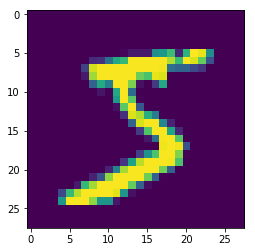

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Flatten 28x28 images to a 28*28=784 vector for each image.

> The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multilayer neural network. Therefore we need to convert the images into a single dimension where each image contains 784-pixel data using the reshape() function.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel values in the images are in the range of 0 - 255 and in this step we reduce this range even further and normalize it between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

label : This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert class vectors to binary class matrices:

> As we can see from above, the output of y_train is an integer from 0 to 9. We need to perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. We need to do this to do a “binarization” of the category and so that we can include it as a feature to train the neural network.

We can use the built in np_utils.to_categorical() helper function in keras to do this.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Print the Y_train array after binarization

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Define the structure of the network

In [10]:
from keras.layers import Activation
model = Sequential()
 
#5th Attempt, Total params:19,837 , batch_size=128, nb_epoch=10
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(22, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 1, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:132: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:133: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:142: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
/usr/local

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 22)        6358      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 22)        88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 22)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 12)        276       
__________

Compile the model based on following:

* Optimization method: Here we use 'adam'
* Kind of loss this method will optimize: Here we use 'categorical_crossentropy'

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Start training the model:

* Batch size: set to 32
* Epoch: set to 10

In [20]:
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
  128/60000 [..............................] - ETA: 1:18 - loss: 0.0699 - acc: 0.9766

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 130us/step - loss: 0.1033 - acc: 0.9561
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0960 - acc: 0.9577
Epoch 3/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0953 - acc: 0.9569
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0918 - acc: 0.9583
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0886 - acc: 0.9588
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0907 - acc: 0.9575
Epoch 7/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0920 - acc: 0.9570
Epoch 8/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0859 - acc: 0.9601
Epoch 9/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0882 - acc: 0.9583
Epoch 10/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0885 - acc: 0.9582


Evaluate the model performance

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the final score

In [22]:
print(score)

[0.017913184435386212, 0.9946]


Here we see how the model predicts from the X_test data set.

> The predict() function takes an array of one or more data instances.

In [0]:
y_pred = model.predict(X_test)

Print the predicted array and the test array

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[2.57903248e-05 1.18159633e-05 1.50511132e-05 2.89420295e-05
  2.58210639e-05 1.63079403e-05 2.34969411e-05 9.99819458e-01
  8.44864371e-06 2.48873748e-05]
 [5.82822613e-05 1.21767240e-04 9.98598039e-01 2.62659305e-04
  2.58553860e-04 2.39530636e-04 2.45811738e-04 3.69061490e-05
  1.68739571e-04 9.82854090e-06]
 [3.86383836e-05 9.99666333e-01 1.89400598e-05 4.55174195e-05
  3.40063525e-05 6.01768079e-05 2.47366315e-05 4.68079015e-05
  3.44706896e-05 3.03426859e-05]
 [9.99672294e-01 2.37830700e-05 1.37853285e-05 4.68159924e-05
  1.17781565e-05 2.03816926e-05 1.02097278e-04 2.77110648e-05
  3.86626089e-05 4.26573097e-05]
 [1.00552343e-05 5.30356665e-05 8.31504894e-06 4.59973999e-05
  9.99680042e-01 6.72220813e-06 1.45167578e-05 6.86424828e-05
  2.65322906e-05 8.62463567e-05]
 [4.92400577e-05 9.99495745e-01 3.09271018e-05 4.60908705e-05
  6.82655882e-05 7.25921491e-05 3.63343242e-05 7.47841259e-05
  6.83199032e-05 5.76861639e-05]
 [5.69441436e-05 2.88368290e-04 1.49564978e-04 2.67473195e

###Summary:

With total params: **19,837** using the approach of doing Convolution -> Batch-normalization -> Dropout at each layer the network is able to achieve validation accuracy of **99.46%**


###Thank you!

References: 

1. [Kaggle: how-to-choose-cnn-architecture-mnist](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist)
2. [Batch Normalization](https://towardsdatascience.com/batch-normalization-theory-and-how-to-use-it-with-tensorflow-1892ca0173ad)
3. [Drop out](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)